# Balance eléctrico REE

In [43]:
import pandas as pd
import json

data = json.load(open("../data/balance-electrico.json"))
demand = data['included'][3]['attributes']['content'][1]['attributes']['values'] # electrical demand
df = pd.DataFrame(demand).drop(columns='percentage')
df

,value,datetime
0,582949.806,2019-01-01T00:00:00.000+01:00
1,742199.407,2019-01-02T00:00:00.000+01:00
2,787764.963,2019-01-03T00:00:00.000+01:00
3,796010.035,2019-01-04T00:00:00.000+01:00
4,721029.651,2019-01-05T00:00:00.000+01:00
5,661772.168,2019-01-06T00:00:00.000+01:00
6,764920.771,2019-01-07T00:00:00.000+01:00
7,844559.085,2019-01-08T00:00:00.000+01:00
8,846151.453,2019-01-09T00:00:00.000+01:00
9,857323.124,2019-01-10T00:00:00.000+01:00


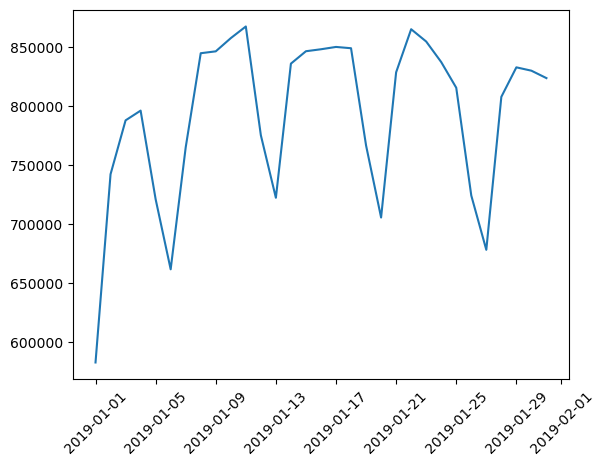

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime, timezone

time = []
for i in range(len(df['datetime'])):
    time.append(datetime.fromisoformat(df['datetime'][i]))
plt.figure()
plt.suptitle('Demanda eléctrica')
plt.plot(time, df['value'])
plt.xticks(rotation=45)
plt.show()

In [42]:
df['value']

0     582949.806
1     742199.407
2     787764.963
3     796010.035
4     721029.651
5     661772.168
6     764920.771
7     844559.085
8     846151.453
9     857323.124
10    867181.886
11    775170.712
12    722271.171
13    835752.360
14    846245.527
15    847911.818
16    849875.833
17    848781.942
18    766537.720
19    705583.355
20    828406.838
21    864855.303
22    854462.174
23    837075.708
24    815349.834
25    724205.323
26    678249.362
27    807644.379
28    832616.612
29    829785.386
30    823510.841
Name: value, dtype: float64

# D-PAD model

### Deep-Shallow Multi-Frequency Patterns Disentangling for Time Series Forecasting

$\textbf{Temporal Structure}$: Data points are recorded sequentially over time.

$\textbf{Stationarity}$: Check if statistical properties remain constant over time.
- Stationary: constant mean and constant variance
- Not stationary --> first we make it stationary and then proceed --> rolling statistics (e.g. moving averages)

$\textbf{Seasonality and Trends}$: Detect repeating patterns and long-term movements.

$\textbf{Autocorrelation}$: Measure relationships between past and future values.


## Best Models Depending on Data Timeframe:

### Short-term Predictions (Seconds to Hours):

- Support Vector Regression (SVR)
- Random Forest & Gradient Boosting (XGBoost, LightGBM)
- Gated Recurrent Units (GRU)
- Temporal Convolutional Networks (TCNs)

### Medium-term Predictions (Days to Weeks):

- Long Short-Term Memory (LSTM)
- Transformers (Attention Mechanisms)
- ARIMA (for linear dependencies)

### Long-term Predictions (Months to Years):

- Exponential Smoothing
- Hybrid Models (ARIMA + LSTM)
- Graph Neural Networks (GNNs) for capturing relational dependencies

In [4]:
import pandas as pd

df = pd.read_csv('../data/ETTh1.csv')

In [9]:
df.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000


$\textbf{HUFL}$: High useful load

$\textbf{HULL}$: High useless load

$\textbf{MUFL}$: Middle useful load

$\textbf{MULL}$: Middle useless load

$\textbf{LUFL}$: Low useful load

$\textbf{LULL}$: Low useless load

$\textbf{OT}$: Oil Temperature 
